<a href="https://colab.research.google.com/github/irfana2006/Exposing-the-truth-with-advanced-fake-news-detection-powered-by-natural-language-processing-/blob/main/real_and_fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fake_and_real_news (1).csv to fake_and_real_news (1).csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load your dataset
df = pd.read_csv("fake_and_real_news.csv")  # Replace with your actual path

# Show initial data
print("Initial Data:")
print(df.head())
print("\nMissing values before cleaning:\n", df.isnull().sum())

# --- 1. Remove duplicates ---
df = df.drop_duplicates()

# --- 2. Handle missing values ---
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# --- 3. Handle outliers using IQR method ---
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

# --- 4. Preprocessing pipeline ---
# Define transformers
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine transformers
preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_cols),
    ("cat", cat_transformer, cat_cols)
])

# Fit and transform the data
X_processed = preprocessor.fit_transform(df)

# Optional: convert back to DataFrame
# Get feature names from one-hot encoding
encoded_cols = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_cols)
all_cols = list(num_cols) + list(encoded_cols)
df_processed = pd.DataFrame(X_processed.toarray(), columns=all_cols)

print("Preprocessed data shape:", df_processed.shape)

Initial Data:
                                                Text label
0   Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake
1  U.S. conservative leader optimistic of common ...  Real
2  Trump proposes U.S. tax overhaul, stirs concer...  Real
3   Court Forces Ohio To Allow Millions Of Illega...  Fake
4  Democrats say Trump agrees to work on immigrat...  Real

Missing values before cleaning:
 Text     0
label    0
dtype: int64
Preprocessed data shape: (9865, 9867)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("fake_and_real_news.csv")

# Check class balance
print(df['label'].value_counts())

# Encode labels
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])  # Fake = 0, Real = 1

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['Text'], df['label_encoded'], test_size=0.2, random_state=42)

# Text preprocessing and vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Final shape
print("Train feature shape:", X_train_tfidf.shape)
print("Test feature shape:", X_test_tfidf.shape)

label
Fake    5000
Real    4900
Name: count, dtype: int64
Train feature shape: (7920, 52507)
Test feature shape: (1980, 52507)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import os # Import the os module

# Load your dataset
file_path = "fake_and_real_news.csv"

# Check if the file exists before trying to read it
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found.")
    print("Please ensure the file is uploaded to your Colab environment.")
else:
    df = pd.read_csv(file_path)  # Replace with your actual path

    # Show initial data
    print("Initial Data:")
    print(df.head())
    print("\nMissing values before cleaning:\n", df.isnull().sum())

    # --- 1. Remove duplicates ---
    df = df.drop_duplicates()

    # --- 2. Handle missing values ---
    # Separate numerical and categorical columns
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = df.select_dtypes(include=['object']).columns

    # --- 3. Handle outliers using IQR method ---
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])

    # --- 4. Preprocessing pipeline ---
    # Define transformers
    num_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ])

    cat_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

    # Combine transformers
    preprocessor = ColumnTransformer(transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols)
    ])

    # Fit and transform the data
    X_processed = preprocessor.fit_transform(df)

    # Optional: convert back to DataFrame
    # Get feature names from one-hot encoding
    encoded_cols = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_cols)
    all_cols = list(num_cols) + list(encoded_cols)
    df_processed = pd.DataFrame(X_processed.toarray(), columns=all_cols)

    print("Preprocessed data shape:", df_processed.shape)

Initial Data:
                                                Text label
0   Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake
1  U.S. conservative leader optimistic of common ...  Real
2  Trump proposes U.S. tax overhaul, stirs concer...  Real
3   Court Forces Ohio To Allow Millions Of Illega...  Fake
4  Democrats say Trump agrees to work on immigrat...  Real

Missing values before cleaning:
 Text     0
label    0
dtype: int64
Preprocessed data shape: (9865, 9867)


Saving fake_and_real_news.csv to fake_and_real_news (1).csv
Initial Data:
                                                Text label
0   Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake
1  U.S. conservative leader optimistic of common ...  Real
2  Trump proposes U.S. tax overhaul, stirs concer...  Real
3   Court Forces Ohio To Allow Millions Of Illega...  Fake
4  Democrats say Trump agrees to work on immigrat...  Real

Missing values before cleaning:
 Text     0
label    0
dtype: int64
Preprocessed data shape: (9865, 9867)
label
Fake    5000
Real    4900
Name: count, dtype: int64
Train feature shape: (7920, 52507)
Test feature shape: (1980, 52507)
TF-IDF shape before selection: (9900, 86029)
Shape after feature selection: (9900, 5000)
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       973
           1       0.99      0.99      0.99      1007

    accuracy                           0.99      1980
  

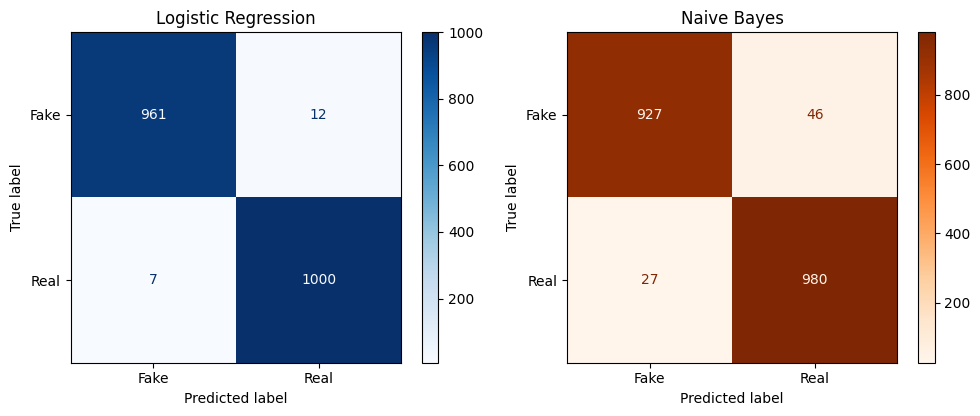

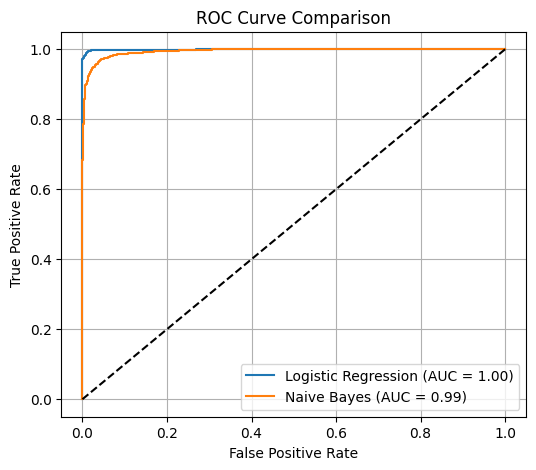

In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
from google.colab import files
uploaded = files.upload()

# %%
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load your dataset
df = pd.read_csv("fake_and_real_news.csv")  # Replace with your actual path

# Show initial data
print("Initial Data:")
print(df.head())
print("\nMissing values before cleaning:\n", df.isnull().sum())

# --- 1. Remove duplicates ---
df = df.drop_duplicates()

# --- 2. Handle missing values ---
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# --- 3. Handle outliers using IQR method ---
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

# --- 4. Preprocessing pipeline ---
# Define transformers
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine transformers
preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_cols),
    ("cat", cat_transformer, cat_cols)
])

# Fit and transform the data
X_processed = preprocessor.fit_transform(df)

# Optional: convert back to DataFrame
# Get feature names from one-hot encoding
encoded_cols = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_cols)
all_cols = list(num_cols) + list(encoded_cols)
df_processed = pd.DataFrame(X_processed.toarray(), columns=all_cols)

print("Preprocessed data shape:", df_processed.shape)

# %%
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("fake_and_real_news.csv")

# Check class balance
print(df['label'].value_counts())

# Encode labels
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])  # Fake = 0, Real = 1

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['Text'], df['label_encoded'], test_size=0.2, random_state=42)

# Text preprocessing and vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Final shape
print("Train feature shape:", X_train_tfidf.shape)
print("Test feature shape:", X_test_tfidf.shape)

# %%
import pandas as pd
import re
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Load dataset
df = pd.read_csv("fake_and_real_news.csv")

# Step 1: Label Encoding
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])  # Fake = 0, Real = 1

# Step 2: Clean Text Function
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning
df['clean_text'] = df['Text'].apply(clean_text)

# Step 3: TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_tfidf = vectorizer.fit_transform(df['clean_text'])

# Step 4: Feature Selection (Top 5000 features)
selector = SelectKBest(score_func=chi2, k=5000)
X_selected = selector.fit_transform(X_tfidf, df['label_encoded'])

print("TF-IDF shape before selection:", X_tfidf.shape)
print("Shape after feature selection:", X_selected.shape)

# --- Model Training ---
# Assuming X_train_tfidf, X_test_tfidf, y_train, y_test are available from a previous cell
# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
lr_preds = lr_model.predict(X_test_tfidf)

# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_preds = nb_model.predict(X_test_tfidf)

# %%
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Classification Reports
print("Logistic Regression Report:\n", classification_report(y_test, lr_preds))
print("\nNaive Bayes Report:\n", classification_report(y_test, nb_preds))

# Confusion Matrices
cm_lr = confusion_matrix(y_test, lr_preds)
cm_nb = confusion_matrix(y_test, nb_preds)

# Display Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ConfusionMatrixDisplay(cm_lr, display_labels=label_encoder.classes_).plot(ax=ax[0], cmap='Blues')
ax[0].set_title("Logistic Regression")

ConfusionMatrixDisplay(cm_nb, display_labels=label_encoder.classes_).plot(ax=ax[1], cmap='Oranges')
ax[1].set_title("Naive Bayes")

plt.tight_layout()
plt.show()

# ROC Curve
# Need to use predict_proba from the trained models
lr_probs = lr_model.predict_proba(X_test_tfidf)[:, 1]
nb_probs = nb_model.predict_proba(X_test_tfidf)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)

# Plot ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc(fpr_lr, tpr_lr):.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc(fpr_nb, tpr_nb):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Download NLTK Data
nltk.download('stopwords')
nltk.download('wordnet')

# Load Data
df = pd.read_csv("fake_and_real_news (1).csv")  # Replace with your file name

# Preprocessing Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    words = text.split()
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply Cleaning
df['clean_text'] = df['Text'].apply(clean_text)

# Label Encoding
df['label'] = df['label'].map({'Real': 0, 'Fake': 1})

# Split Data
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42, stratify=df['label'])

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": MultinomialNB()
}

# Train and Evaluate
for name, model in models.items():
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:")
    print(classification_report(y_test, preds))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Model: Logistic Regression
Accuracy: 0.9924242424242424
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1000

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980


Model: Random Forest
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980


Model: Naive Bayes
Accuracy: 0.9686868686868687
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98   